### 如何 0–1 來預測新酒品的市場趨勢？
##### 深度學習 - Part 1 : EDA 與 Python 畫圖工具
##### 作者：黃榮晟(臺灣行銷研究特邀作者)、劉加德(臺灣行銷研究特邀編審)、鍾皓軒(臺灣行銷研究有限公司創辦人）

###### 「品酒」已經不再是有錢人的權利，在這個美酒當道的年代，我們要如何像 Somm 電影的品酒師，一口就能辨別出「口感」、「年份」、「產地」，甚至預測下一季爆款的酒呢？

###### 原始檔案請見[本連結](https://drive.google.com/open?id=1heSaQTTt1jsI1tnIWgpr1NF6kb_G85_I&authuser=howard32180900%40tmrmds.co&usp=drive_fs)

Reference: Plotting with pandas, matplotlib, and seaborn | Kaggle

This section covers follwoing aspects:
* Pandas basic plot functions,
* Basic style functions
* Subplots function
* Pairplot
* Heatplot

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 若無法讀取，請在csv檔案前加上檔案路徑
df_original = pd.read_csv("winemag-data_first150k.csv")

In [3]:
# Check the first five rows.
df_original.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
# See how many columns and rows in the dataset.
df_original.shape

(150930, 11)

<AxesSubplot:>

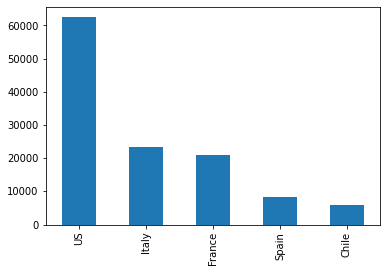

In [5]:
# Plot Bar chart
df_original['country'].value_counts().head(5).plot.bar()

<AxesSubplot:>

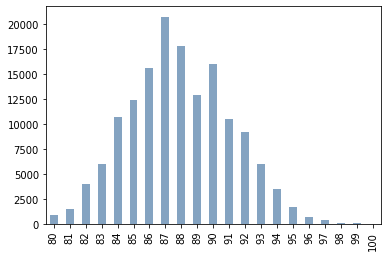

In [6]:
df_original['points'].value_counts().sort_index().plot.bar(color=(0.2, 0.4, 0.6, 0.6))

<AxesSubplot:>

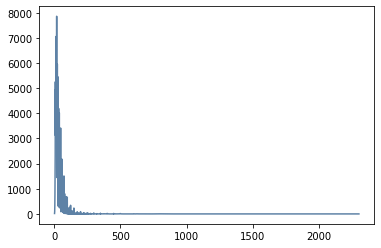

In [7]:
#Plot Price
df_original['price'].value_counts().sort_index().plot.line(color=(0.1, 0.3, 0.5, 0.7))

<AxesSubplot:>

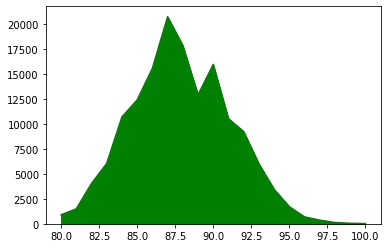

In [8]:
df_original['points'].value_counts().sort_index().plot.area(color=['green'])

<AxesSubplot:xlabel='points', ylabel='price'>

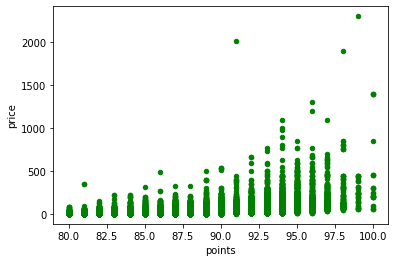

In [9]:
#Scatter Plot
df_original.plot.scatter(x='points', y='price', color=['green'])

Text(0, 0.5, 'Count')

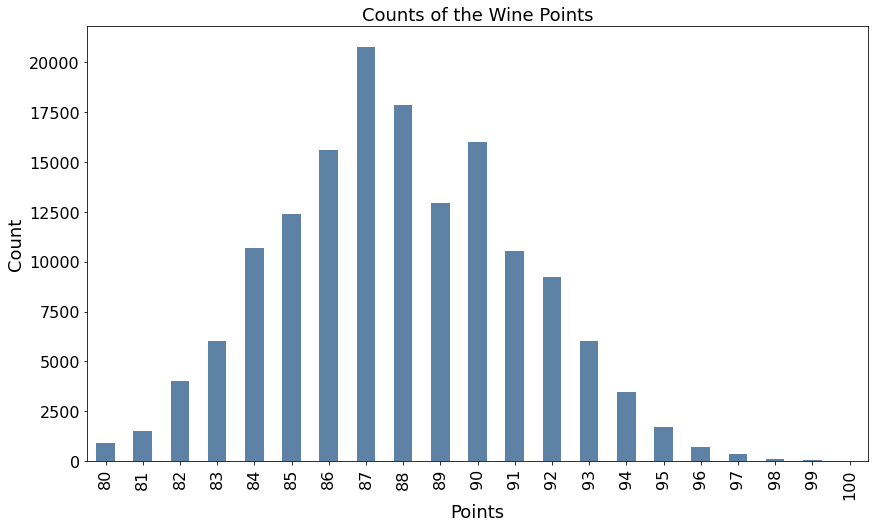

In [10]:
import matplotlib as mlt
#Using Matplotlib: Change the title fontsize 

plot01 = df_original['points'].value_counts().sort_index().plot.bar(
    figsize = (14,8),
    fontsize = 16,
    color=(0.1, 0.3, 0.5, 0.7)
)
plot01.set_title("Counts of the Wine Points", fontsize = 18)
plot01.set_xlabel("Points", fontsize = 18)
plot01.set_ylabel("Count", fontsize = 18)

Text(0.5, 1.0, 'No of Wines from Winery')

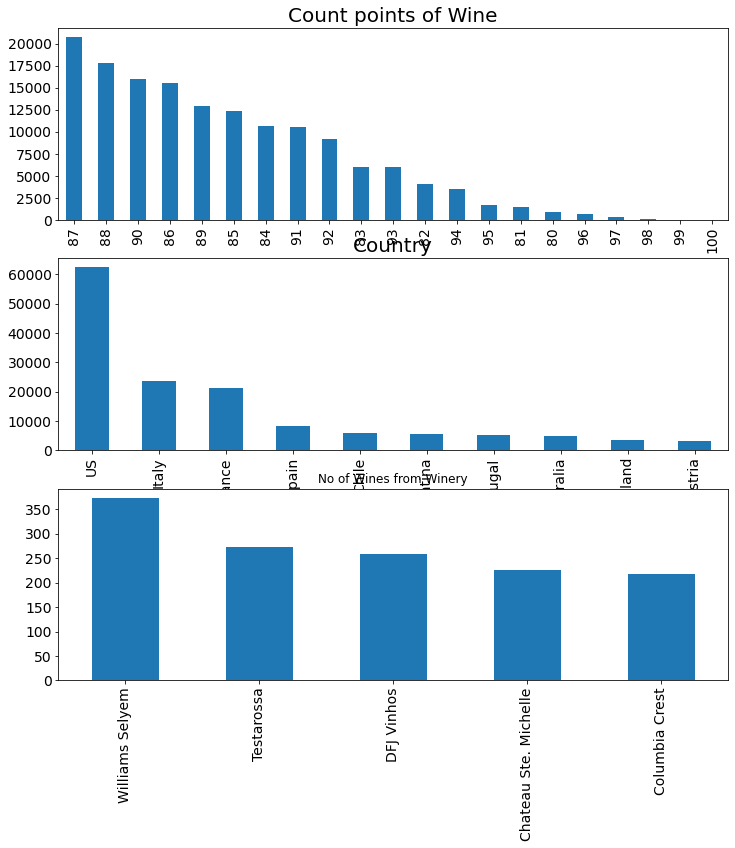

In [11]:
import matplotlib.pyplot as plt
#Creating a frame of rows and columns to place the plots
fig, axi = plt.subplots(3,1, figsize = (12,12))
#plot1
df_original['points'].value_counts().plot.bar(
    ax = axi[0],
    fontsize = 14    
)
axi[0].set_title("Count points of Wine", fontsize = 20)
#Plot2
df_original['country'].value_counts().head(10).plot.bar(
    ax = axi[1],
    fontsize = 14
)
axi[1].set_title('Country', fontsize = 20)
#plot3
df_original['winery'].value_counts().head().plot.bar(
    ax = axi[2],
    fontsize = 14
)
axi[2].set_title("No of Wines from Winery")

In [12]:
df_original.isnull().count()

Unnamed: 0     150930
country        150930
description    150930
designation    150930
points         150930
price          150930
province       150930
region_1       150930
region_2       150930
variety        150930
winery         150930
dtype: int64

# Exploring with *seaborn* package

In [13]:
 import seaborn as sns

<AxesSubplot:xlabel='country', ylabel='count'>

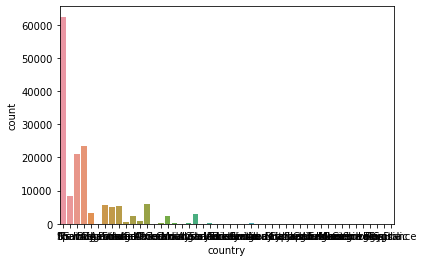

In [14]:
sns.countplot(df_original['country'])

<AxesSubplot:xlabel='province', ylabel='count'>

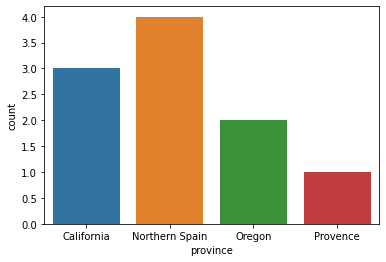

In [15]:
# Bar plot: Top 10 Province.
sns.countplot(df_original['province'].head(10))

Text(0.5, 1.0, 'Price of Wine')

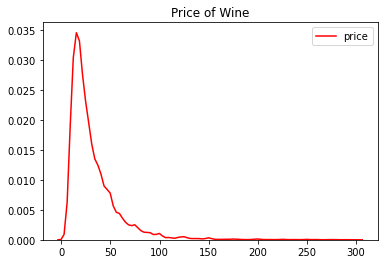

In [16]:
plot02 = sns.kdeplot(df_original.query('price < 300').price, color='red')
plot02.set_title("Price of Wine")

# Histogram plot in *Seaborn*


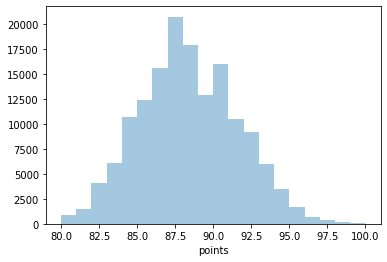

In [17]:
hislpot = sns.distplot(df_original['points'], bins = 20, kde = False)

<AxesSubplot:xlabel='variety', ylabel='points'>

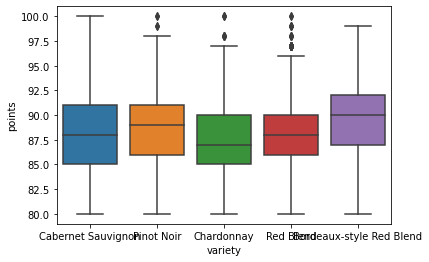

In [18]:
df01 = df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]

sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df01
)

## Seaborn
### Facet Grid

In [19]:
df_original.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [20]:
#Extract wine scores from two countries US and France
df_fourcountry = df_original[df_original['country'].isin(['US','France', 'Canada', 'Spain'])]
#g = sns.FacetGrid(df, col = "country", col_wrap = 2)

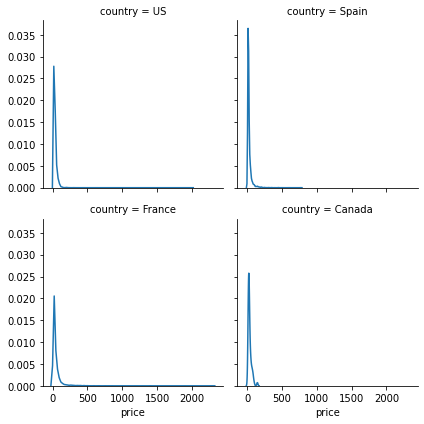

In [21]:
plot03 = sns.FacetGrid(df_fourcountry, col = "country", col_wrap = 2)
plot03.map(sns.kdeplot, "price")

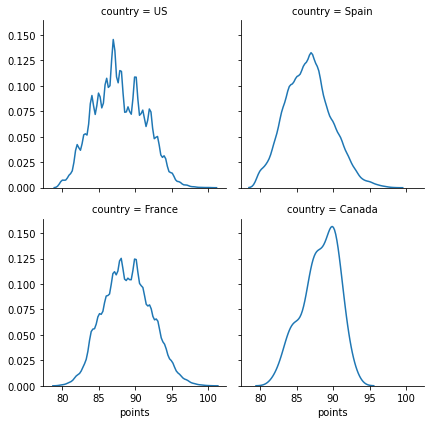

In [23]:
plot03 = sns.FacetGrid(df_fourcountry, col = "country", col_wrap = 2)
plot03.map(sns.kdeplot, "points")